Assuntos:

- Complexidade assintótica (Notação big O)
- Força bruta
- Algorítimo de Pollard's Rho
- general number field sieve
- Algorítimo de Shor

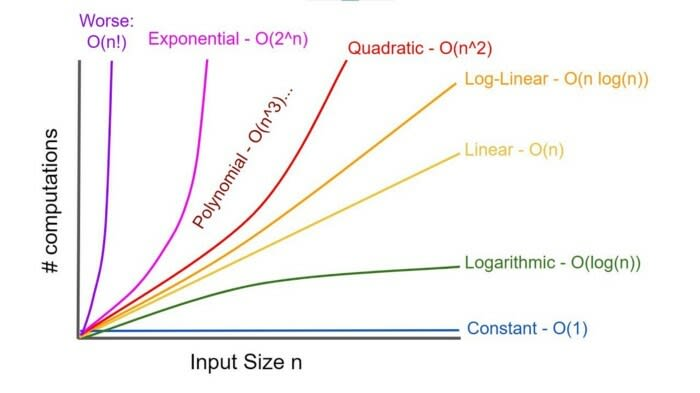

In [91]:
import math
import random

método rápido (e ineficiente) para checar se um número é primo ou não

In [62]:
def checkPrime(n):
    for e in range(2, int(math.sqrt(n))+1):
        #print(e)
        if n % e == 0:
            return False

    return True

def primesUpToN(n):
    prime_list = []
    for e in range(2, n):
        if(checkPrime(e)):
            prime_list.append(e)
    
    return prime_list

A função checkPrime tem tempo de execução O(sqrt(n))

OBS: existem testes de primalidade mais eficientes do que esse

In [75]:
def bruteForceFactorization(n):
    primes = primesUpToN(n)
    #print(primes)

    prime_factors = []
    for x in primes:
        while n % x == 0:
            #print(n)
            n = n / x
            prime_factors.append(x)

            if n == 1:
                return prime_factors
    return prime_factors

In [90]:
bruteForceFactorization(2155214)

[2, 1077607]

In [126]:
def pollardRho(n):
    i = 1
    x = random.randint(0, n-1)
    y = x
    k = 2

    while True:
        i += 1
        x = (x**2 -1) % n
        d = math.gcd(y - x, n)

        print(x, d)

        if d!=0 and d!=n:
            print(d)
        
        if i==k:
            y = x
            k = 2*k
        
        if i==n:
            break

In [127]:
pollardRho(12)

3 1
1
8 1
1
3 12
8 1
1
3 12
8 1
1
3 12
8 1
1
3 12
8 1
1
3 12


In [105]:
import random
import math

def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def pollard_rho(n):
    if n % 2 == 0:
        return 2

    def f(x):
        return (x*x + 1) % n

    x = random.randint(1, n-1)
    y = x
    d = 1

    while d == 1:
        x = f(x)
        y = f(f(y))
        d = gcd(abs(x - y), n)

    if d == n:
        return None  # Failure case; retry with different parameters
    else:
        return d

def factorize(n):
    factors = []
    while n % 2 == 0:
        factors.append(2)
        n //= 2

    while n > 1:
        divisor = pollard_rho(n)
        if divisor is None:
            break
        while n % divisor == 0:
            factors.append(divisor)
            n //= divisor

    if n > 1:
        factors.append(n)

    return factors



In [140]:
from datetime import datetime as dt

number = random.randint(0, 10000)

In [141]:
t_start = dt.now()
print("Factors of", number, "are:", bruteForceFactorization(number))
print(dt.now() - t_start)

Factors of 6902 are: [2, 7, 17, 29]
0:00:00.011234


In [142]:
t_start = dt.now()
print("Factors of", number, "are:", factorize(number))
print(dt.now() - t_start)

Factors of 6902 are: [2, 203, 17]
0:00:00.000391


In [133]:
import requests

def factorize_large_number(n):
    response = requests.get(f"http://factordb.com/api?query={n}")
    data = response.json()

    if 'status' in data and data['status'] == 'ok':
        return data['factors']
    else:
        return "Error or factorization not found."

t_start = dt.now()
print(f"Factors of {number} are: {factorize_large_number(number)}")
print(dt.now() - t_start)

Factors of 358110288 are: Error or factorization not found.
